In [290]:
# This code is a foundation for an adaptive control system for the FASTBLADE facility. A GPR machine learning model is
# used to adapt control throttle and loading frequencies to ensuring gain values are maintained and loading criteria 
# is met. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.externals import joblib 
from math import log
import matplotlib.pyplot as plt

# Obtaining Sample Data

In [4]:
data=pd.read_csv(r"C:\Users\Peter's 2nd Laptop\OneDrive - University of Edinburgh\My Docs (late Sept)\Final Report\AAAAK006.csv" )
time=data.DataTime
desired=data.DesiredLoad
actual=data.RecordedLoad
throttle=data.pumpThrottle4

# Initial Conditions

In [ ]:
init_freqin=0.8
init_rval=0.5 
init_stiff=2.8
init_force=880

# Modelling and Plotting Stiffness Reduction

In [7]:
finalstiffratio=0.6
weakening=10**(log(finalstiffratio,10)/len(desired))
stiff=np.zeros(len(desired))

for i in range(0,len(desired)):
    stiff[i]=init_stiff*weakening**(i)
    
freqin=np.full(len(desired),init_freqin)
force=np.full(len(desired),init_force)
rval=np.full(len(desired),init_rval)

x = {'freq': freqin, 'rval': rval, 'stiff': stiff, 'force': force}
X_test = pd.DataFrame(data=x)

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


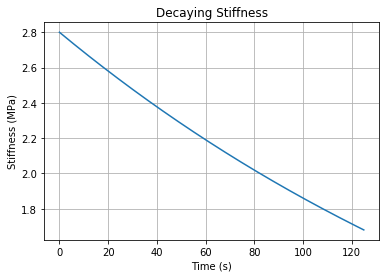

In [8]:
plt.plot(time,stiff)
plt.xlabel('Time (s)')
plt.ylabel('Stiffness (MPa)')
plt.grid('on')
plt.title('Decaying Stiffness')
plt.savefig('Report Decaying Stiffness.png')

# Reduction in Gain Over Test Without Adaptive Control

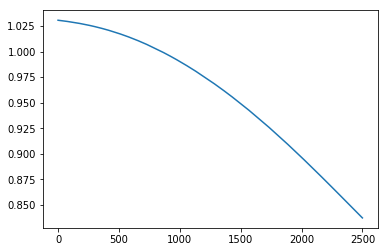

In [9]:
model = joblib.load('MODEL.pkl')  
gain_from_model=model.predict(X_test)
plt.plot(gain_from_model)

# Modelling Increased Flexure

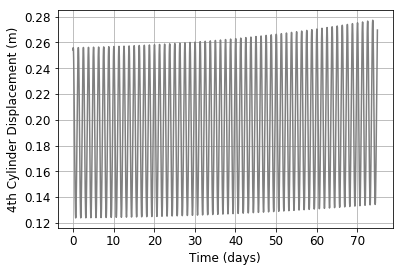

In [26]:
plt.plot(time[0:end],damaged_stroke[0:end],'grey')
plt.xlabel('Time (days)',fontsize=12)
plt.ylabel('4th Cylinder Displacement (m)',fontsize=12) 
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('Report Increasing Flexure.png')

# Function Using Machine Learning to Get Gain Values

In [13]:
def get_gain(newfreq,pos):
    
    for i in range(pos,len(freqin)):
        freqin[i]=newfreq
    
    x = {'freq': freqin, 'rval': rval, 'stiff': stiff, 'force': force}
    X_test = pd.DataFrame(data=x)
    gain_from_model=model.predict(X_test) 
    
    return(gain_from_model)

# Adapting Throttle & Frequency

In [14]:
freqs_to_try=np.linspace(0.7, 0.1,7) 
print(freqs_to_try)

[0.7 0.6 0.5 0.4 0.3 0.2 0.1]


In [15]:
newthrottle=np.zeros(len(desired))
freqs_to_try=[0.7,0.6,0.5,0.4,0.3,0.2,0.1]
freq_count=-1

for i in range(0,len(gain_from_model)):
    newthrottle[i]=(throttle[i]/gain_from_model[i])
    
    if newthrottle[i]>1 and newthrottle[i-1]<1:
        freq_count+=1
        print('Frequency Change to {}Hz at {}s'.format(freqs_to_try[freq_count],time[i]))
        newgainfrommodel=get_gain(freqs_to_try[freq_count],i)
        
        for j in range(i,len(freqin)):
            gain_from_model[j]=newgainfrommodel[j]

Frequency Change to 0.7Hz at 43.5s
Frequency Change to 0.6Hz at 74.75s
Frequency Change to 0.5Hz at 111.0s


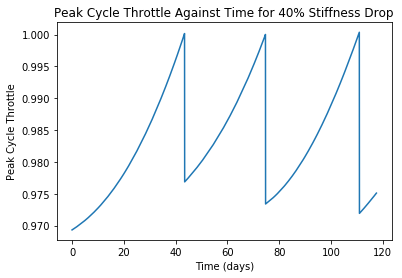

In [26]:
plt.plot(time[:-149],max(throttle)/gain_from_model[:-149]) # max throttle per cycle
plt.xlabel('Time (days)')
plt.ylabel('Peak Cycle Throttle')
plt.title('Peak Cycle Throttle Against Time for 40% Stiffness Drop')
plt.savefig('Report Freq drops 40%.png')

# Adapted Throttle Values Over Time

Text(0, 0.5, 'Newthrottle')

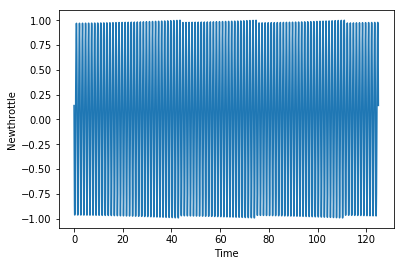

In [20]:
end=len(newthrottle)
plt.plot(time[0:end],newthrottle[0:end])
plt.xlabel('Time')
plt.ylabel('Newthrottle')